# To predict diabetes using PIMA diabetes data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import warnings
warnings.filterwarnings('ignore')

C:\Users\rkbra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('datasets/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### Correlation

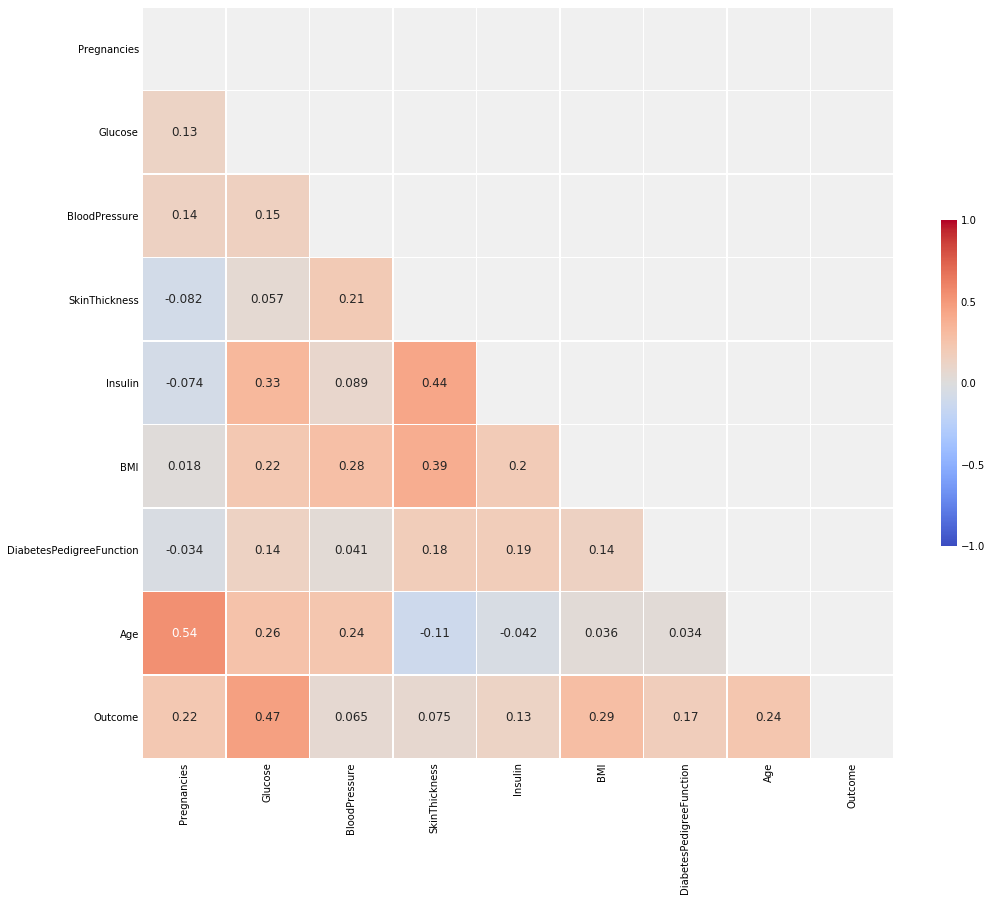

In [8]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Target Variable

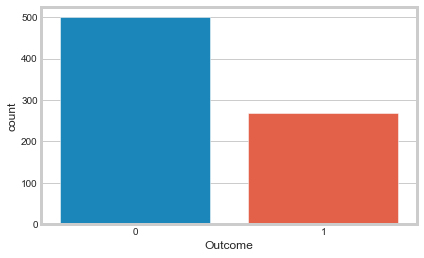

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Data Distribution

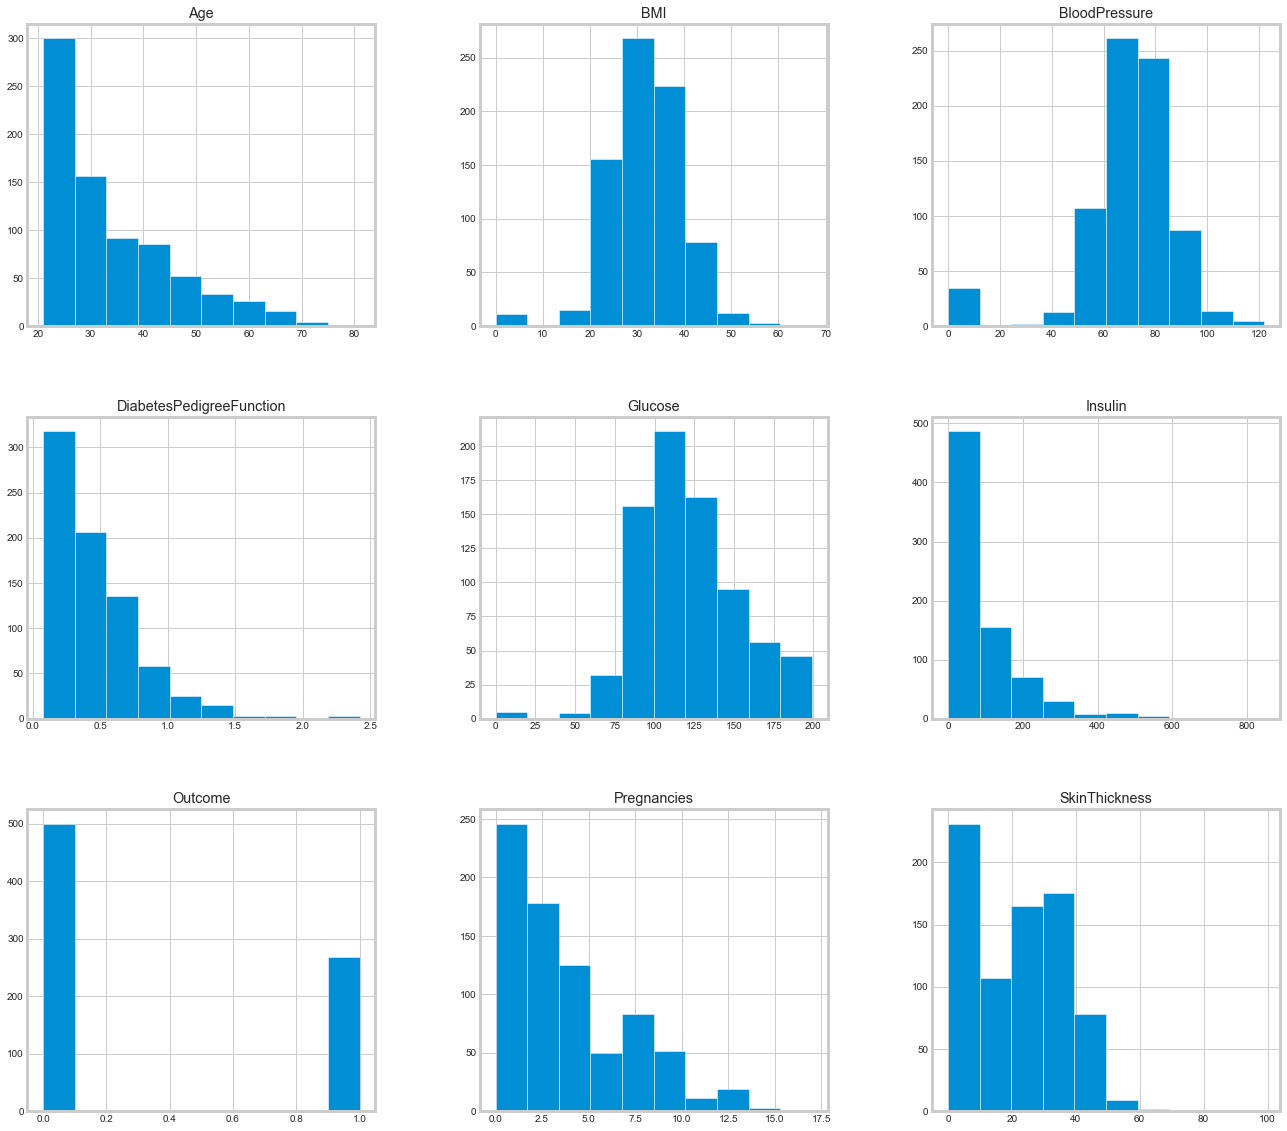

In [12]:
df.hist(figsize=(20,20));

### Log Transformation

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
for var in X.columns:
    X[var] = np.log1p(X[var])
    
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.945910,5.003946,4.290459,3.583519,0.000000,3.543854,0.486738,3.931826
1,0.693147,4.454347,4.204693,3.401197,0.000000,3.317816,0.300845,3.465736
2,2.197225,5.214936,4.174387,0.000000,0.000000,3.190476,0.514021,3.496508
3,0.693147,4.499810,4.204693,3.178054,4.553877,3.370738,0.154436,3.091042
4,0.000000,4.927254,3.713572,3.583519,5.129899,3.786460,1.190279,3.526361


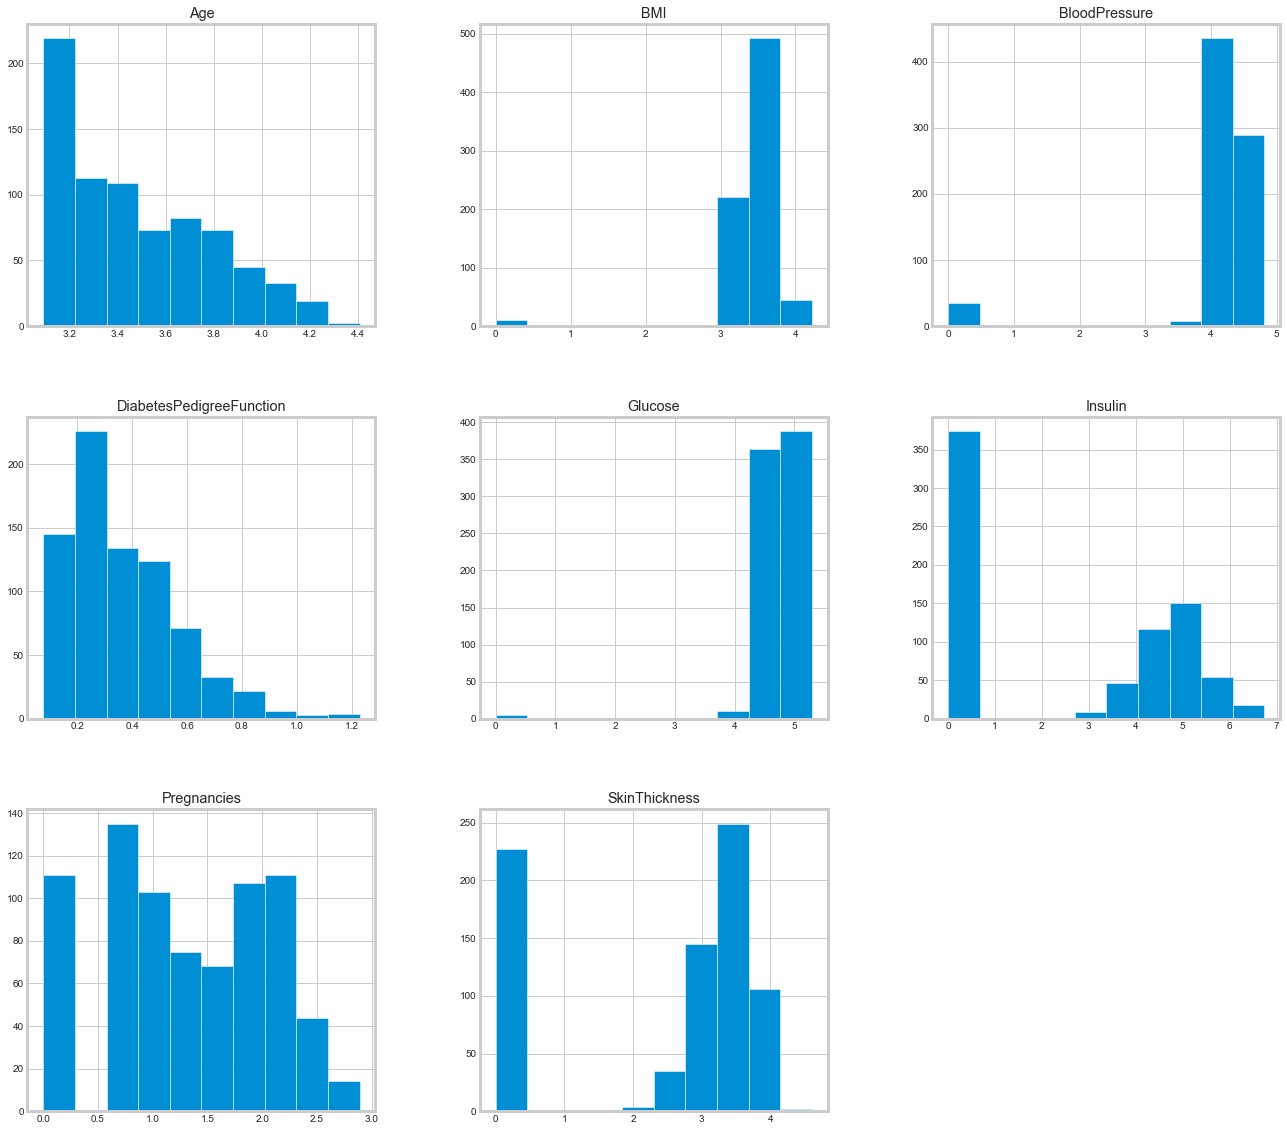

In [16]:
X.hist(figsize=(20,20));

## Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)
(X_train.shape, X_test.shape)

((512, 8), (256, 8))

***Data Split 2: all of our final dataset, with scaling***

In [18]:
X2 = X.copy()
sc = StandardScaler()

X2[X.columns] = sc.fit_transform(X[X.columns])
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/3,random_state=42, stratify=y)

In [19]:
X2_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
657,-0.802604,0.104745,0.339228,0.987965,1.151581,0.534847,2.045144,0.817778
462,1.152449,-0.941707,0.194309,0.873447,0.585709,0.330215,0.848107,0.661979
171,0.825781,0.344280,0.194309,0.529397,0.977458,0.336169,0.341580,-0.256662
210,-0.275566,-0.746483,0.027354,0.502054,-1.005417,-0.178171,-0.557894,-0.713619
147,-0.275566,-0.164276,0.097206,0.789893,0.941786,0.023284,2.571583,0.235580


## KNNClassififer

In [20]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X2_train,y2_train,scoring='roc_auc',cv=10)
    knn_scores.append(np.round(score.mean(), 3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

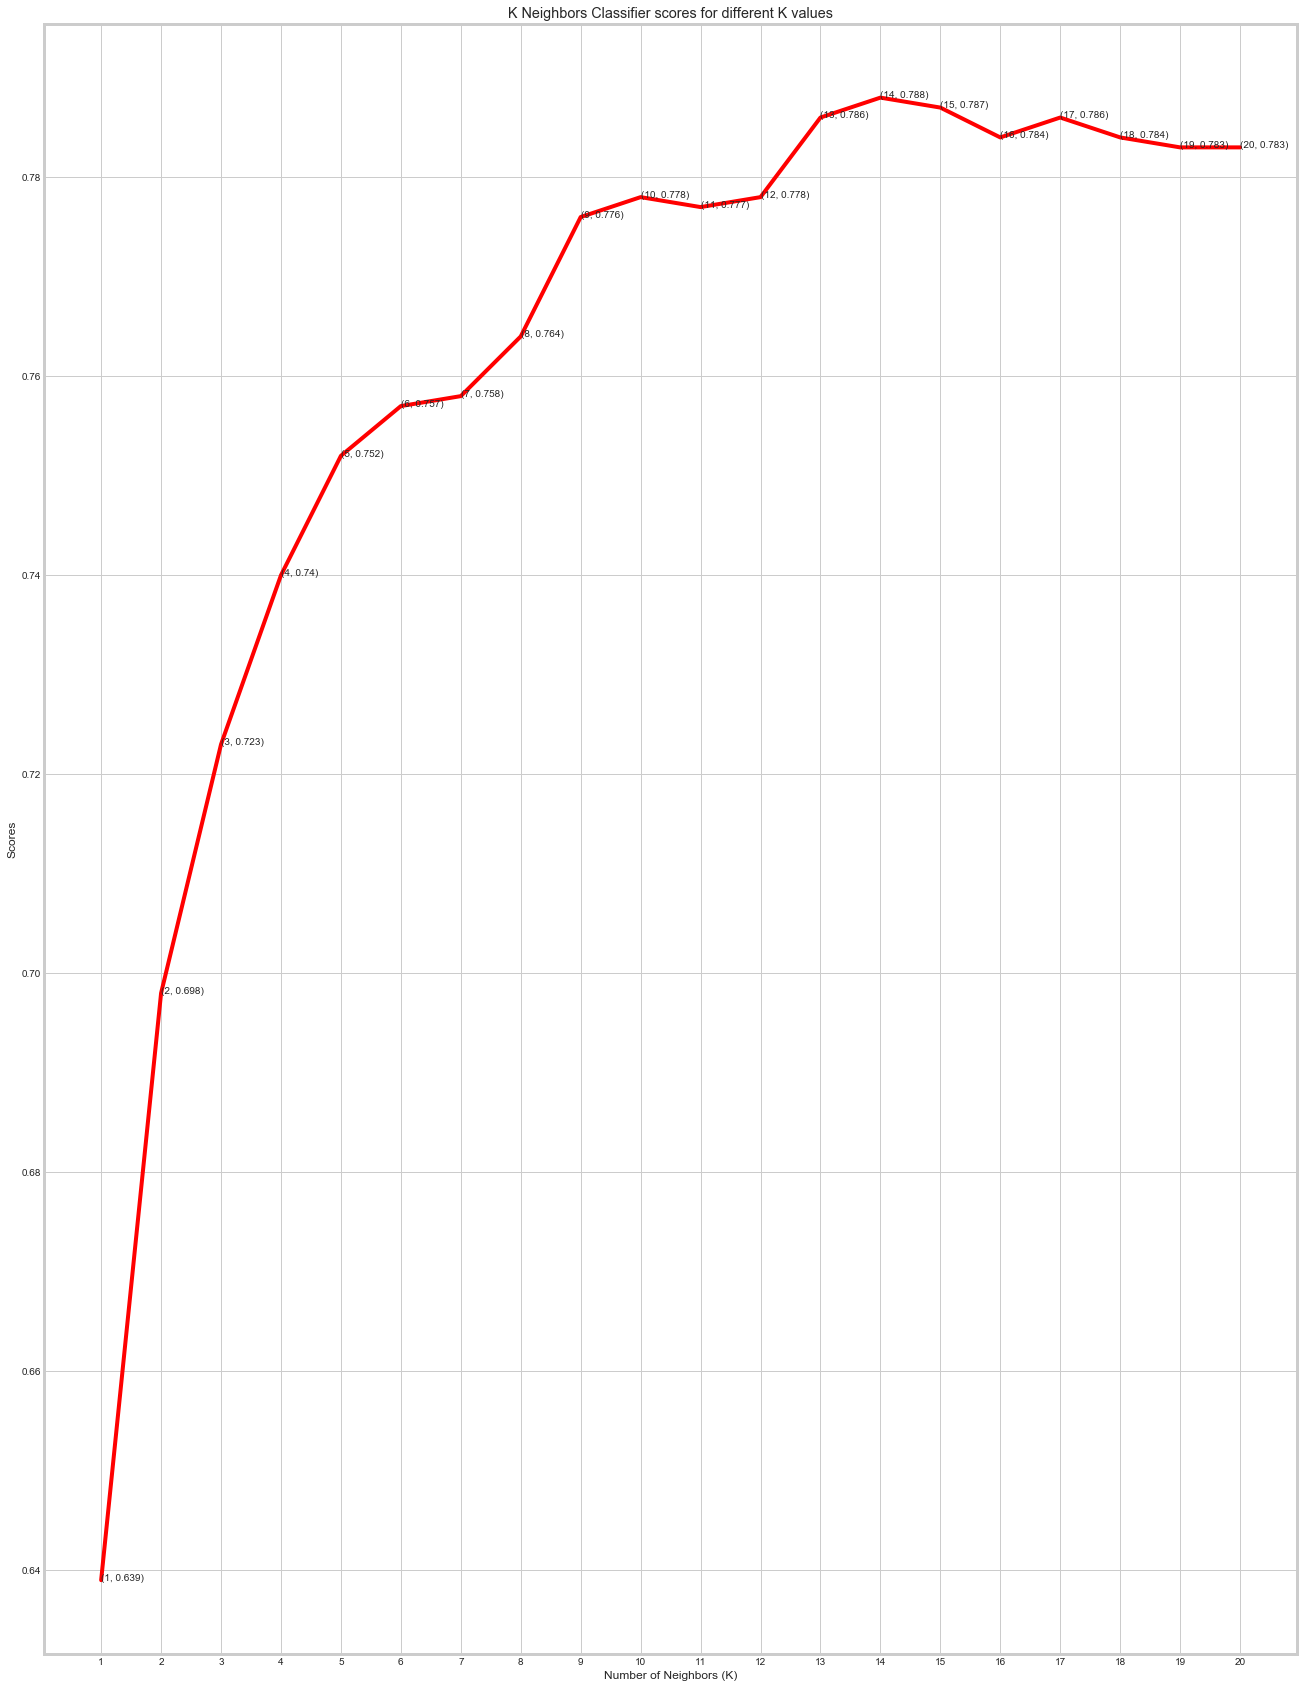

In [21]:
plt.figure(figsize=(20,30))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=14)

In [23]:
knn_predict_proba = knn.predict_proba(X2_test)
knn_predict = knn.predict(X2_test)

In [24]:
knn_predict_proba[:10][:,1]

array([0.        , 0.5       , 0.5       , 0.14285714, 0.64285714,
       0.35714286, 0.71428571, 0.78571429, 0.07142857, 0.35714286])

In [25]:
y2_test[:10]

52     0
64     1
630    1
707    0
330    0
358    0
712    1
740    1
418    0
389    0
Name: Outcome, dtype: int64

In [26]:
conf_matrix = confusion_matrix(y2_test, knn_predict)
conf_matrix

array([[148,  19],
       [ 55,  34]], dtype=int64)

In [27]:
print(classification_report(y2_test, knn_predict))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       167
           1       0.64      0.38      0.48        89

    accuracy                           0.71       256
   macro avg       0.69      0.63      0.64       256
weighted avg       0.70      0.71      0.69       256



In [28]:
total=sum(sum(conf_matrix))

sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.729064039408867
Specificity :  0.6415094339622641


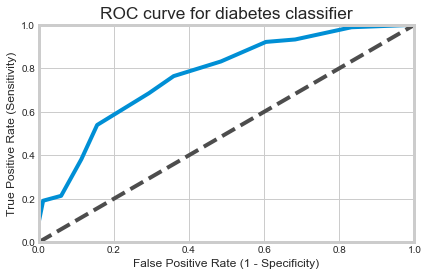

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [30]:
auc(fpr, tpr)

0.7667698311242683

## RandomForestClassifier

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,10,6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

In [34]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, scoring='roc_auc', n_jobs=-1)

rf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='roc_auc')

In [35]:
rf_grid_predict = rf_grid.predict(X_test)
rf_grid_pred_proba = rf_grid.predict_proba(X_test)[:, 1]

In [36]:
rf_grid_pred_proba[10:30]

array([0.51755778, 0.49938608, 0.42712378, 0.83866098, 0.70439716,
       0.7713855 , 0.5214516 , 0.02188287, 0.18420384, 0.61857051,
       0.10551407, 0.2607169 , 0.12416087, 0.43655433, 0.15081602,
       0.55462422, 0.38370222, 0.48060655, 0.25511619, 0.12865228])

In [37]:
y_test[10:30]

437    0
21     0
164    1
206    1
480    1
247    0
115    1
158    0
380    0
399    1
700    0
139    0
736    0
351    0
279    0
99     1
578    0
580    1
73     0
151    0
Name: Outcome, dtype: int64

In [38]:
conf_matrix = confusion_matrix(y_test, rf_grid_predict)
conf_matrix

array([[139,  28],
       [ 39,  50]], dtype=int64)

In [39]:
print(classification_report(y2_test, knn_predict))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       167
           1       0.64      0.38      0.48        89

    accuracy                           0.71       256
   macro avg       0.69      0.63      0.64       256
weighted avg       0.70      0.71      0.69       256



In [40]:
total=sum(sum(conf_matrix))

sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7808988764044944
Specificity :  0.6410256410256411


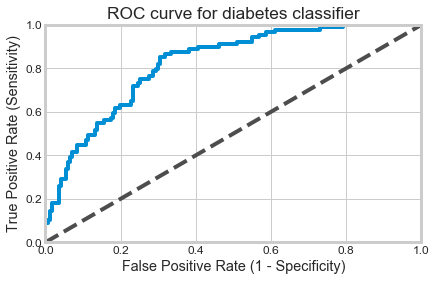

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, rf_grid_pred_proba)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
auc(fpr, tpr)

0.8219067483011505

## XgBoost

In [43]:
import xgboost

In [44]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [45]:
classifier=xgboost.XGBClassifier()

In [46]:
random_search=RandomizedSearchCV(classifier, param_distributions=params,
                                 n_iter=5, scoring='roc_auc', n_jobs=-1,
                                 cv=5, verbose=3)

In [47]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [48]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished



 Time taken: 0 hours 0 minutes and 2.71 seconds.


In [49]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [50]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [51]:
score=cross_val_score(classifier, X, y.ravel(), cv=10, scoring='roc_auc')
score.mean()

0.7988945868945869

In [52]:
classifier.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [53]:
xgboost_pred = classifier.predict(X_test)
xgboost_pred_proba = classifier.predict_proba(X_test)[:, 1]

In [54]:
xgboost_pred_proba[10:30]

array([0.5649983 , 0.66370094, 0.37327716, 0.83121026, 0.7410641 ,
       0.9391378 , 0.4924677 , 0.00718339, 0.16699056, 0.7728316 ,
       0.01173284, 0.01446781, 0.04501681, 0.43440977, 0.04547089,
       0.25589564, 0.64327574, 0.24157406, 0.05401951, 0.16236457],
      dtype=float32)

In [55]:
y_test[10:30]

437    0
21     0
164    1
206    1
480    1
247    0
115    1
158    0
380    0
399    1
700    0
139    0
736    0
351    0
279    0
99     1
578    0
580    1
73     0
151    0
Name: Outcome, dtype: int64

In [56]:
conf_matrix = confusion_matrix(y_test, xgboost_pred)
conf_matrix

array([[133,  34],
       [ 41,  48]], dtype=int64)

In [57]:
print(classification_report(y_test, xgboost_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       167
           1       0.59      0.54      0.56        89

    accuracy                           0.71       256
   macro avg       0.67      0.67      0.67       256
weighted avg       0.70      0.71      0.70       256



In [58]:
total=sum(sum(conf_matrix))

sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.764367816091954
Specificity :  0.5853658536585366


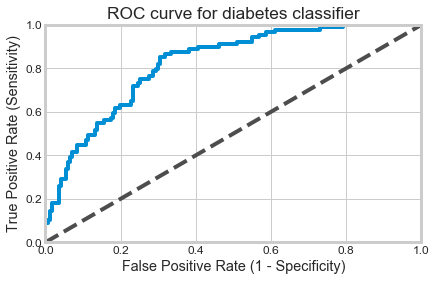

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, rf_grid_pred_proba)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [60]:
auc(fpr, tpr)

0.8219067483011505

## Pickle the Model

In [61]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 14))

y = df.Outcome
X = df.drop('Outcome',1)
model = pipeline.fit(X,y)

In [62]:
import joblib

joblib.dump(model, './models/diabetes.pickle')

['./models/diabetes.pickle']

In [63]:
model = joblib.load('./models/diabetes.pickle')

In [64]:
pred_proba = model.predict_proba(np.array(X.iloc[0]).reshape(1, -1))

In [65]:
pred_proba

array([[0.42857143, 0.57142857]])

In [66]:
y[0]

1

In [67]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
np.array(X.iloc[4]).reshape(1, -1)

array([[  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
         33.   ]])